### Importing libraries needed

### Marking Scheme
> Each Major Section earns you 10points, You get points for code clarity and completeness. You also get major extra points for explaining your analysis and results. My comments will be attached as markdowns(such as this) at the end of each section so yuou should watch out for those.

In [9]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
import xgboost as xgb
plt.style.use('fivethirtyeight')


### Loading DataSet

In [10]:
# Storing dataset into a variable

electric_motor_data = pd.read_csv('measures_v2.csv')

# Load the dataset

electric_motor_data

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


# Exploratory Data Analysis


In [4]:
# Display summary statistics of the dataset

print("\nElectric Motor Stat:")
print(electric_motor_data.describe())



Electric Motor Stat:
                u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.330816e+06  1.330816e+06    1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01  3.622999e+01    6.634275e+01 -2.513381e+01  5.687858e+01   
std    4.417323e+01  2.178615e+01    2.867206e+01  6.309197e+01  2.295223e+01   
min   -2.529093e+01  1.062375e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.206992e+01  1.869814e+01    4.278796e+01 -7.869090e+01  3.841601e+01   
50%    4.893818e+01  2.690014e+01    6.511013e+01 -7.429755e+00  5.603635e+01   
75%    9.003439e+01  4.985749e+01    8.814114e+01  1.470271e+00  7.558668e+01   
max    1.330370e+02  1.015985e+02    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   2.202081e+03 -6.871681e+01  3.741278e+01  5.850678e+01  4.818796e+01   
std    1.85

In [18]:
# Displays info about the dataset & data types 

print("\nDataset Information:")
print(electric_motor_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB
None


All columns are float datatype except profile_id

In [19]:
# Display the last few rows of the dataset

print("\nElectric Motor Tail:")
electric_motor_data.tail()


Electric Motor Tail:


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71
1330815,-2.100158,30.721319,45.132307,0.807309,41.734763,0.004395,-2.000792,1.096487,62.131429,38.660370,24.027522,-2.139547e-60,71


In [20]:
#describe the shape of the dataset

electric_motor_data.shape

(1330816, 13)

from the output above we have 1330816 rows and 13 columns in our dataset

In [21]:
# Display the first few rows of the dataset

print("\nElectric Motor Head:")
electric_motor_data.head()


Electric Motor Head:


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [22]:
#checking for missing values

missing_values = electric_motor_data.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


All columns have a count of 0 missing values

In [23]:
# Find the mode (most common value) of the 'motor_speed' column in the electric_motor_data DataFrame.

electric_motor_data['motor_speed'].mode()

0    4999.945801
Name: motor_speed, dtype: float64

In [8]:
# Generate summary statistics for each numeric feature in the dataset and transpose the result for easier readability


electric_motor_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
-0.32573699951171875,1330814.0,54.279087,44.173216,-25.290930,12.069935,48.938189,90.034405,133.036994
18.818571090698242,1330814.0,36.230021,21.786155,10.623751,18.698135,26.900189,49.857489,101.598512
19.092390060424805,1330814.0,66.342816,28.672024,18.585815,42.787977,65.110144,88.141172,141.362885
-0.30580300092697144,1330814.0,-25.133847,63.092012,-131.530411,-78.691486,-7.429946,1.470271,131.469788
18.29480743408203,1330814.0,56.878640,22.952202,18.133976,38.416094,56.036435,75.586699,111.946423
0.0002567816700320691,1330814.0,2202.084037,1859.662788,-275.549144,317.162249,1999.976685,3760.647038,6000.015137
0.0006058723665773869,1330814.0,-68.716913,64.933227,-278.003632,-115.406455,-51.093829,-2.979688,0.051897
-0.0007853526622056961,1330814.0,37.412839,92.181938,-293.426793,1.095863,15.774007,100.612165,301.707855
24.53807830810547,1330814.0,58.506827,19.001466,20.856956,43.151710,60.266332,72.008384,113.606628
18.31495475769043,1330814.0,48.188010,19.990985,18.076689,31.990490,45.625528,61.460881,101.147964


reading the analysis above we see:

| Statistic           | Value          |
|---------------------|----------------|
| Minimum             | -275.55 RPM    |
| 25th Percentile     | 317.11 RPM     |
| Median              | 1,999.98 RPM   |
| 75th Percentile     | 3,760.64 RPM   |
| Maximum             | 6,000.02 RPM   |



In [24]:
# Based on the above statistics for the 'profile_id' column, appears that each observation has a unique 'profile_id' value ranging from 2 to 81. 
# The 'profile_id' column likely serves as an identifier for different profiles or experiments conducted in the datase.
## Its safe to drop it without affecting our prediction

electric_motor_data.drop('profile_id',axis=1,inplace=True)

### Explore Distribution

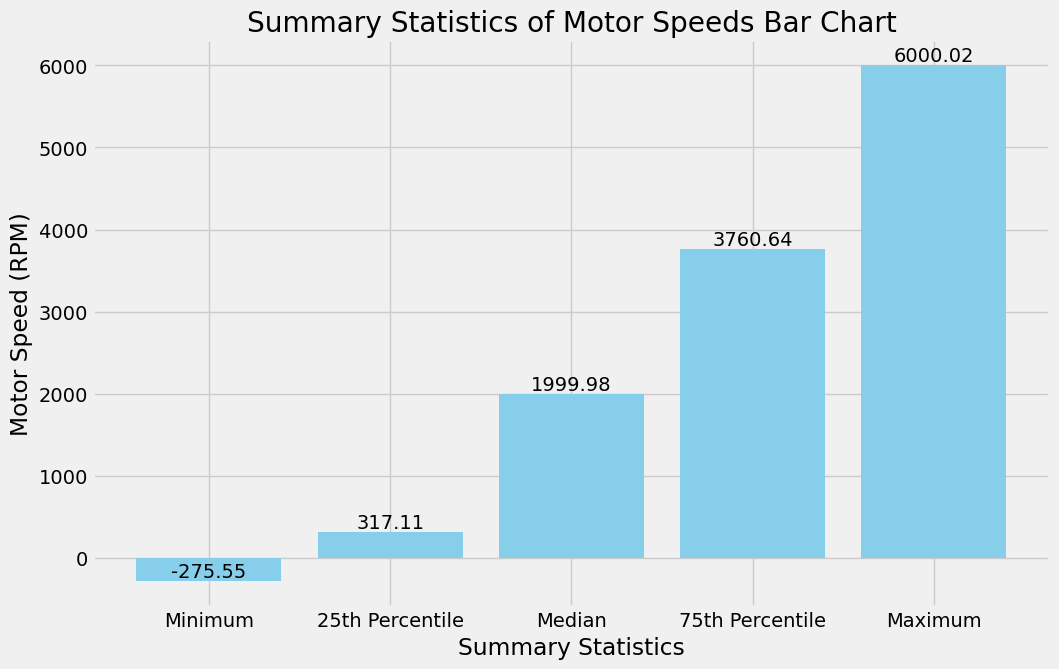

In [18]:
# Summary statistics

summary_stats = {'Minimum': -275.55,'25th Percentile': 317.11,'Median': 1999.98,'75th Percentile': 3760.64,'Maximum': 6000.02}

# Create a bar plot
plt.figure(figsize=(11, 7))
plt.bar(summary_stats.keys(), summary_stats.values(), color='skyblue')

# Add labels and title
plt.xlabel('Summary Statistics')
plt.ylabel('Motor Speed (RPM)')
plt.title('Summary Statistics of Motor Speeds Bar Chart')

# Add text annotations
for key, value in summary_stats.items():
    plt.text(key, value, str(value), ha='center', va='bottom')

plt.show()


### insights from the bar chart:

The bar chart gives us a clear picture of the motor speeds we're dealing with. We see quite a range, from a minimum of -275.55 RPM to a maximum of 6000.02 RPM. Looking at the middle of the pack, the median speed sits at 1999.98 RPM, meaning half of the speeds are below this mark and half are above it.

Now, when we look at how spread out these speeds are, the quartiles help us. For instance, the 25th percentile tells us that a quarter of the data falls below 317.11 RPM, while the 75th percentile indicates that three-quarters fall below 3760.64 RPM. This shows us that there's quite a range in the speeds, with some motors running much faster or slower than others.

However, it's worth noting that we have a negative minimum speed, which seems odd and suggests there might be some outliers or errors in the data. This is something we might want to investigate further.

Overall, the bar chart neatly presents these summary statistics, making it easy for us to understand the distribution of motor speeds in our dataset. It gives us a good starting point for analyzing and interpreting our data.

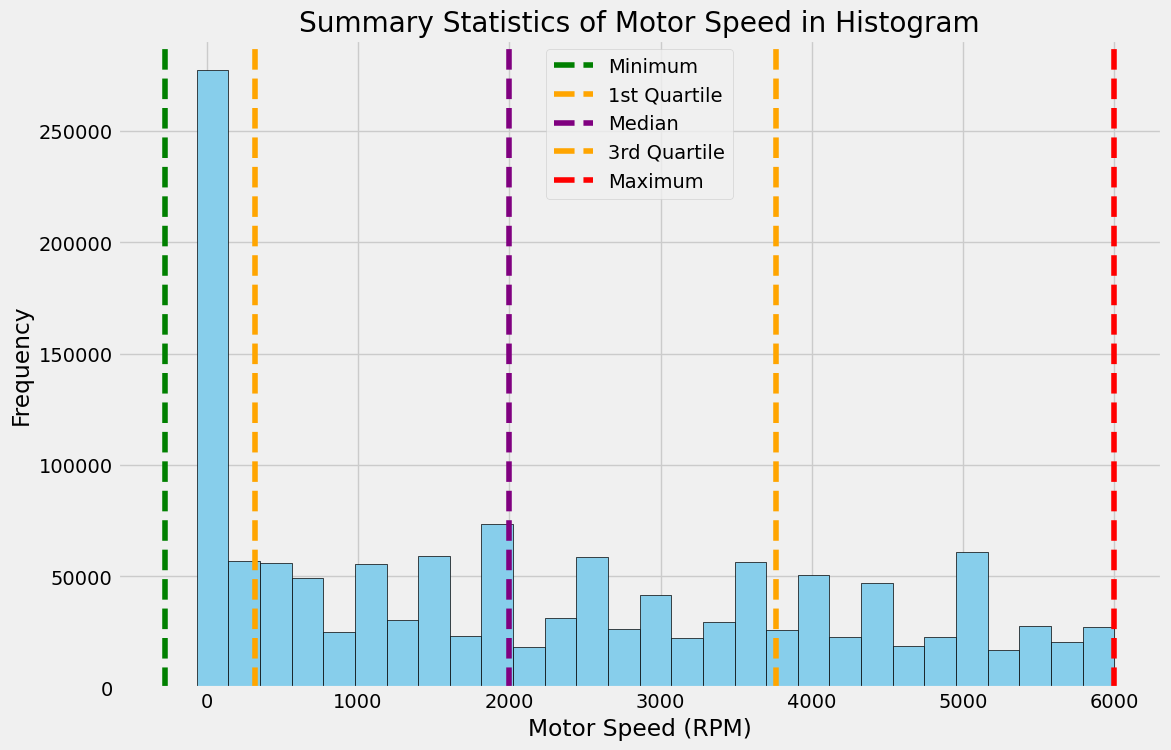

In [17]:
# Summary statistics

minimum = -275.55
first_quartile = 317.11
median = 1999.98
third_quartile = 3760.64
maximum = 6000.02

# Create a histogram

plt.figure(figsize=(12, 8))
plt.hist(electric_motor_data['motor_speed'], bins=30, color='skyblue', edgecolor='black')

# add vertical lines for summary statistics

plt.axvline(x=minimum, color='green', linestyle='--', label='Minimum')
plt.axvline(x=first_quartile, color='orange', linestyle='--', label='1st Quartile')
plt.axvline(x=median, color='purple', linestyle='--', label='Median')
plt.axvline(x=third_quartile, color='orange', linestyle='--', label='3rd Quartile')
plt.axvline(x=maximum, color='red', linestyle='--', label='Maximum')

# add labels and title
plt.xlabel('Motor Speed (RPM)')
plt.ylabel('Frequency')
plt.title('Summary Statistics of Motor Speed in Histogram')

# add legend
plt.legend()

# show plot
plt.show()


The histogram above shows the frequency of different motor speed values, with the x-axis representing the motor speed and y-axis representing the count of occurences within the dataset. The bars represent the frequency of motor speed values within specific ranges, with taller bars indicating more occurences. This visual representation helps in understanding the distribution pattern of the data, showing that the motor speed data is right-skewed with most values concentrated on the lower end. The presence of quartiles and the median provides insight into the data's distribution and can help identify skewness, outliers and the spread of the data around the central values. 

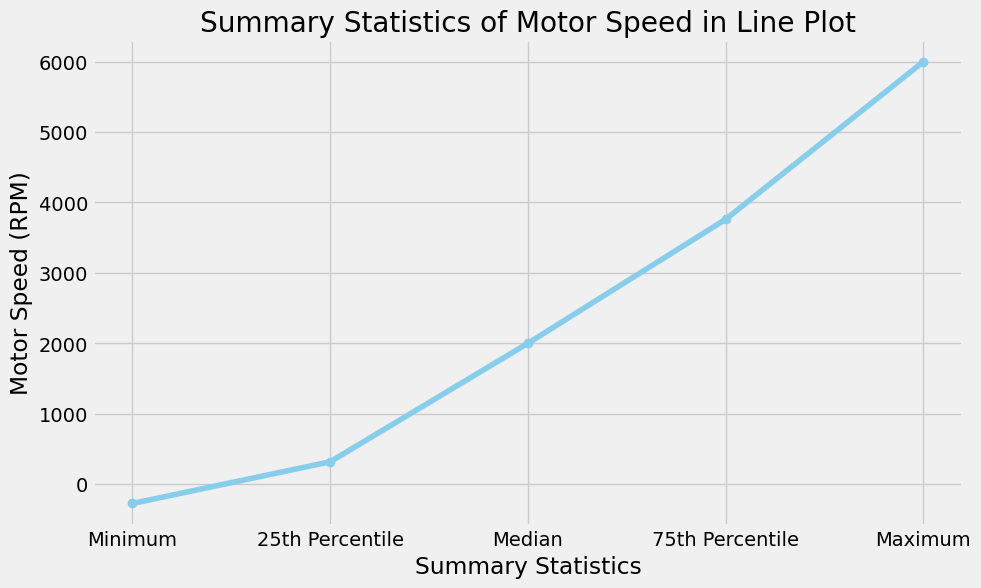

In [16]:
# motor_speed data

motor_speeds = [-275.55, 317.11, 1999.98, 3760.64, 6000.02]

# Summary statistics labels

summary_labels = ['Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(summary_labels, motor_speeds, marker='o', color='skyblue', linestyle='-')

# Add labels and title

plt.xlabel('Summary Statistics')
plt.ylabel('Motor Speed (RPM)')
plt.title('Summary Statistics of Motor Speed in Line Plot')

# Show grid

plt.grid(True)

# Show plot
plt.show()


The above is a lineplot, the line connecting these points visually indicates the progression from the minimum value through the quartiles to the maximum value. This can help in identifying any potential skewness or outliers in the data. For example, if the line is not evenly spaced between the points, it may suggest that the data is not uniformly distributed. In this case, the plot suggests a relatively even increase from the minimum to the 75th percentile, with a steeper increase between the 75th percentile and the maximum, which may indicate that the highest motor speeds are more spread out than the lower ones.

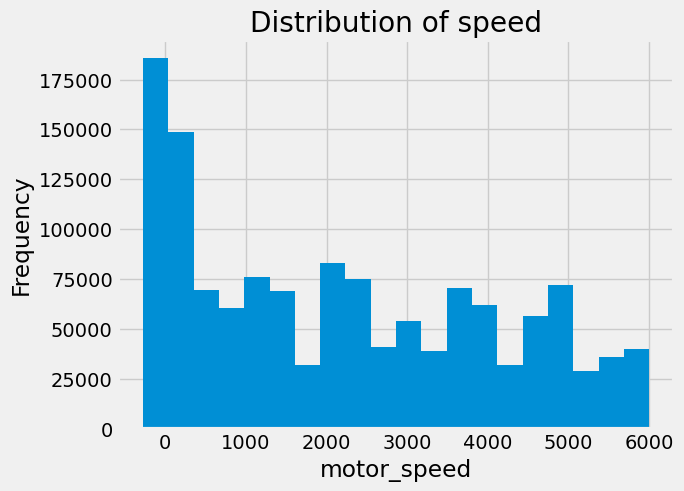

In [15]:
plt.hist(electric_motor_data['motor_speed'], bins=20)
plt.xlabel('motor_speed')
plt.ylabel('Frequency')
plt.title('Distribution of speed')
plt.show()

From the histogram, we can observe that the frequency is highest for the lowest range of motor speeds, indicating that most of the data points fall within the lower speed ranges. As the motor speed increases, the frequency of observations generally decreases, but there are some variations with certain higher speed ranges showing a slight increase in frequency compared to adjacent bins. In our dataset higher motor spedds are less.

### Comment
> You need to explain what each graph tells us, what information are they passing across? What did we learn from our exploratory data analysis??

> <b> SCORE: 4/10 </b>

 # Normality Checking

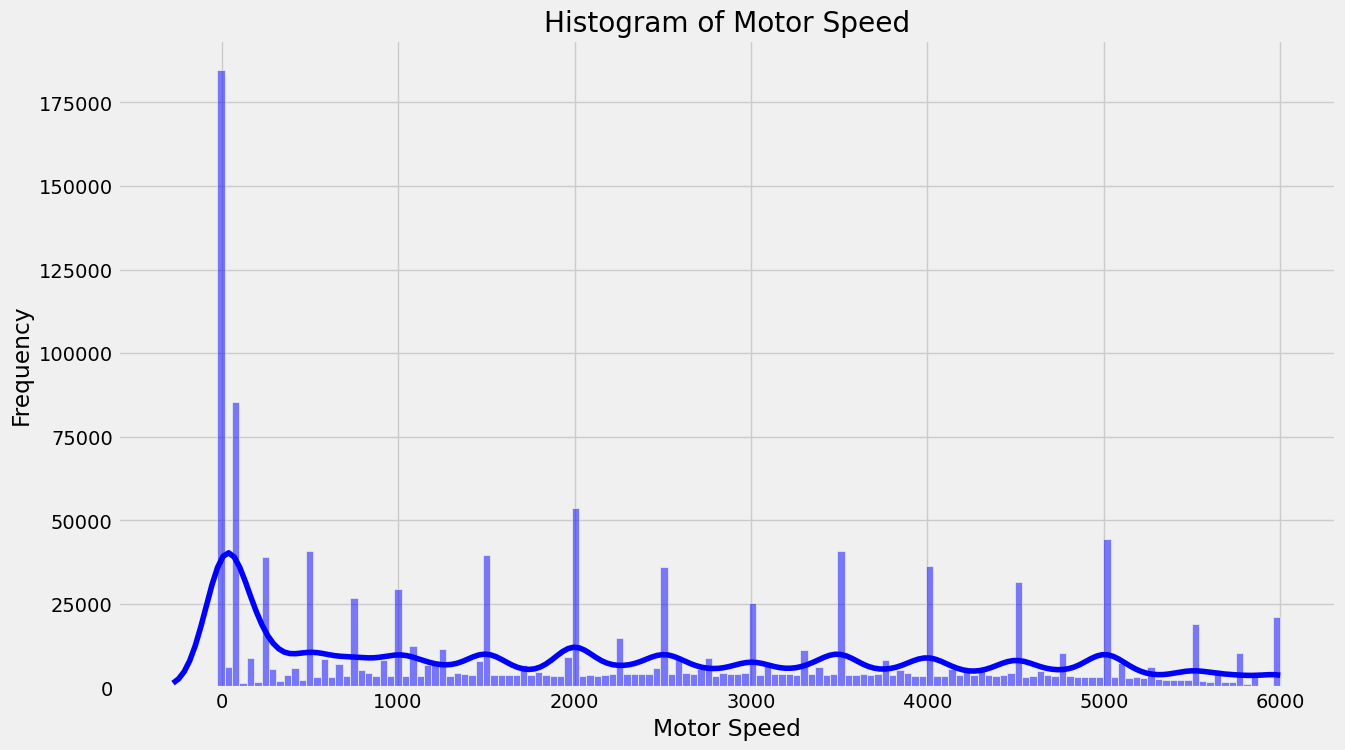

In [14]:
# Histogram Plot

plt.figure(figsize=(14, 8))
sns.histplot(electric_motor_data['motor_speed'], kde=True, bins=150, color='blue')
plt.title('Histogram of Motor Speed')
plt.xlabel('Motor Speed')
plt.ylabel('Frequency')
plt.show()


### The histogram shows data about motor speed. It has multiple peaks, suggesting different common motor speeds. The shape indicates its not a perfect bell curve, meaning its not normally distributed.

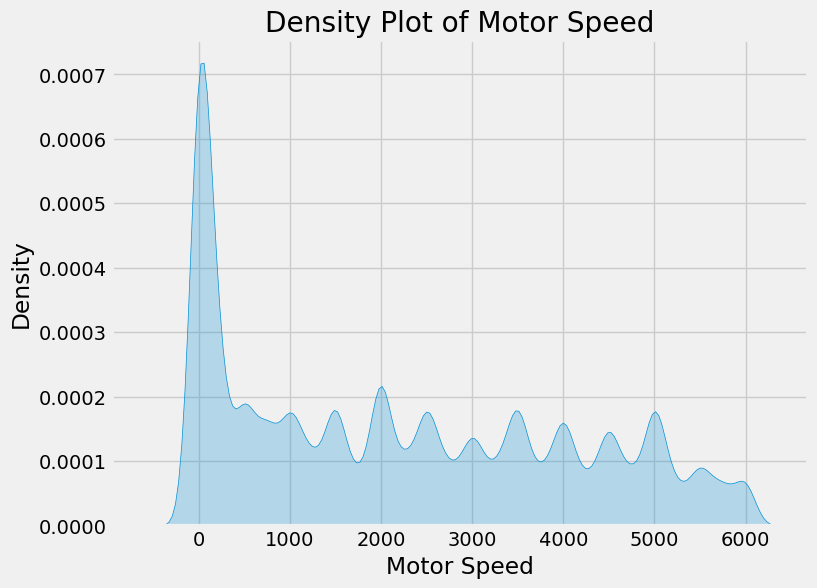

In [13]:
# Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(electric_motor_data['motor_speed'], shade=True)
plt.title('Density Plot of Motor Speed')
plt.xlabel('Motor Speed')
plt.show()


### This density plot is similar to the histograms but provide a smoother representation of the distribution of the continuous variable

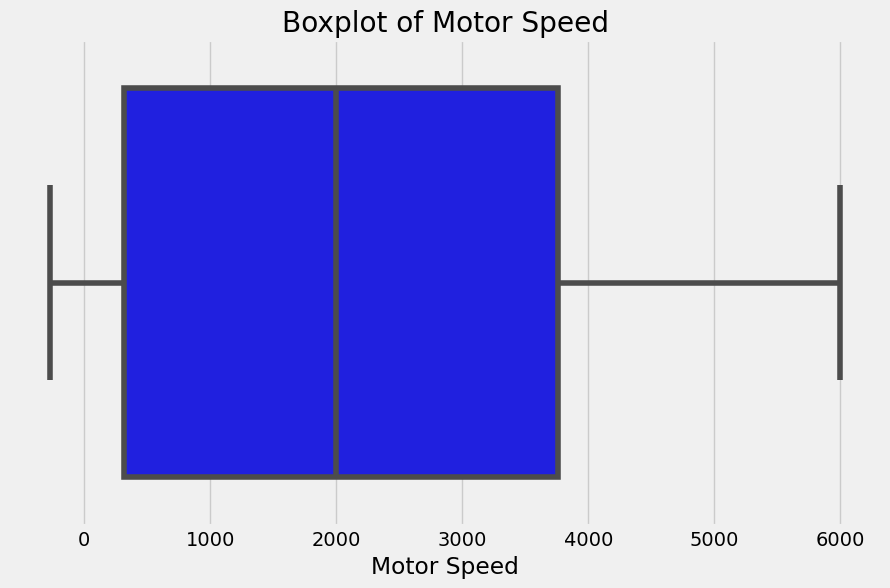

In [12]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=electric_motor_data, x='motor_speed', color='blue')
plt.title('Boxplot of Motor Speed')
plt.xlabel('Motor Speed')
plt.show()


The boxplot indicates potential skewness towards higher values, as the median is closer to the third quartile. Additionally, the right skewness is evident from the longer whisker on the right side of the box. While there are no clear outliers beyond the whiskers, there may be some extreme values closer to the lower quartile. Overall, the boxplot reinforces the conclusion drawn from the histogram that the data is not normally distributed. The asymmetry and skewness observed in the boxplot are typical characteristics that deviate from the assumptions of a normal distribution.

### Comment

> What is the new information we learnt after checking for normality within the dataset?

> <b> SCORE: 4/10 </b>

# Data Preprocessing

In [6]:
electric_motor_data.columns


Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [11]:
df = electric_motor_data.drop(columns=['profile_id'])

### Data Seperation into target and feature variables


In [12]:
# Data Seperation as X and y
# variable x is the input variable
# variable y is the output variable

X = df.drop(columns=['motor_speed'])
y = df['motor_speed'] 
                            


### Data Splitting into training and testing set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
from sklearn.linear_model import LinearRegression  # Import the regressor instead
model = LinearRegression()  # Create an instance of the regressor
model.fit(X_train, y_train)  # Fit the model to your training data


LinearRegression()

 Our dataset was split in 80/20 ratio due to the size of the data and its complexity

### Comment
> Why did you decide to split your data into 80/20 ratio?
> What Informed your decision?
> If you are making any changes or manipulations to your dataset, you must include justifications. Justifications should come from the relevant literature or should be informed by validated and authentic scientific principles

In [23]:
X_train

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1251160,124.007388,77.613088,101.029631,32.209503,88.877908,-107.900625,-21.662085,77.677751,79.978385,26.384226,-1.987349e+01,79
163456,57.527096,18.913023,100.976372,-115.861679,78.706665,-167.769104,52.260456,94.319550,52.868156,23.957901,4.907787e+01,19
1023047,65.215283,61.221979,92.212654,19.930842,82.034955,-9.062089,-39.020698,73.851321,72.045574,23.452414,-2.915178e+01,62
357003,12.086784,18.833757,19.850620,0.888710,19.781832,-1.999608,1.098275,28.566383,19.597221,23.187435,1.385711e-01,13
442062,91.658028,18.452337,31.663160,-44.314957,30.187914,-13.557089,64.153259,40.761520,26.274120,22.016336,4.657424e+01,30
...,...,...,...,...,...,...,...,...,...,...,...,...
212912,3.945009,23.066671,124.161209,-130.733185,91.852173,-221.129807,114.238640,94.238861,63.778324,23.163063,1.115063e+02,23
65615,4.685454,19.392906,131.140915,-130.854553,94.806961,-230.813248,155.749313,83.380829,64.424896,23.204872,1.517621e+02,32
864087,119.097423,65.635575,101.045617,41.064676,89.085928,-96.975594,-27.797330,81.895060,78.677585,26.389876,-2.549907e+01,51
210755,2.619557,21.950739,124.393318,-130.969345,90.910141,-225.475784,115.610596,84.891563,62.610722,22.110428,1.130987e+02,23


In [20]:
X_test

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque
424534,4.175080,18.298996,19.470448,1.480600,18.696995,-2.000426,1.096520,23.368107,18.602362,23.012505,0.432702
1156633,67.859800,49.764450,91.840921,-112.387949,76.987543,-81.940312,186.695917,65.636679,65.033401,25.307312,150.000000
797076,131.343989,49.258930,78.709832,1.369659,70.546131,-42.277001,-2.599181,71.587023,60.658636,25.160387,-2.983891
1072024,131.524921,25.951773,63.920811,-3.017179,54.178931,-61.329965,0.374352,55.706147,42.770511,26.341890,-0.624918
359348,12.060310,18.289375,19.823488,0.764874,19.210705,-2.000953,1.096710,26.102446,19.062996,23.261389,0.111280
...,...,...,...,...,...,...,...,...,...,...,...
895521,1.391687,29.560364,48.713180,0.829883,44.405325,-2.000949,1.097093,46.224636,38.253773,25.626079,-0.000009
1181745,46.043545,49.834344,124.312847,-111.816101,96.805784,-120.961129,239.725071,68.544816,78.571610,25.546716,197.595152
591415,31.092173,18.406639,58.811481,-40.752422,44.900383,-65.979172,172.999023,44.783436,35.535587,23.953117,139.245209
664020,77.574078,28.648232,64.002792,105.953221,54.530234,-106.366833,-103.099632,68.083803,43.460085,25.392192,-89.960276


### Scaling numerical features

In [14]:
# Scaling our Dataset
# Using the StandardScaler
# Because its robust and suitable when the data has varying scales.

scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Fit the scaler on the testing data and transform it
X_test_scaled = scaler.transform(X_test)


We used standardScaler library because it is robust and suitable for dataset that have varying scales just like our dataset, although normalization have similar traits to StandardScaler but depending on the model and algorithm we want to use which is linear and the likes below we chose to use standardscaler. Normalization are mostly used for Neural Network especially deep learning.

### Comment
> Again, why? Why did you standardize the dataset? Why did you not normalize instead?  why did you use standardScaler library? Why did you not use another library like for example MinMaxScaler?

> <b>SCORE: 4/10 <b>

# Model Development

##### initializing and training the model

In [15]:

def predict(model):
    print('Model: {}'.format(model))
    
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print('Mean Squared Error:', mse)
    
    r2 = r2_score(y_test, y_pred)
    print('R^2 Score:', r2)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print('Mean Absolute Error:', mae)
    
    # Calculate Root Mean Squared Error (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    print('Root Mean Squared Error:', rmse)
    
    sns.displot(y_test - y_pred)




### Comments
> Good use of functions 👍🏾

# Model Evaluation and Prediction

Model: LinearRegression()

Mean Squared Error: 218251.97048709771

R^2 Score: 0.9369344615141609

Mean Absolute Error: 341.8298401428008

Root Mean Squared Error: 467.17445401808703


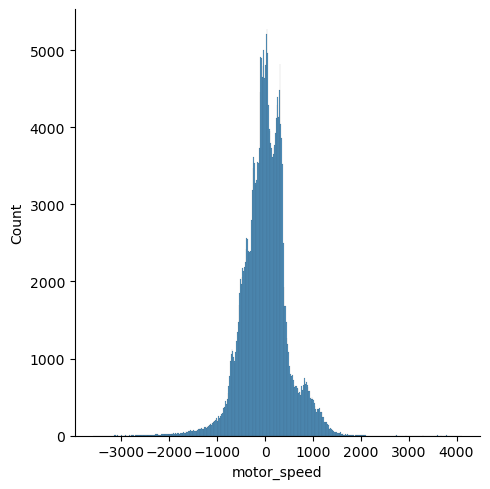

In [8]:
predict(LinearRegression())

Model: GradientBoostingRegressor()

Mean Squared Error: 12626.61674520482

R^2 Score: 0.9963514446970928

Mean Absolute Error: 69.89474161235336

Root Mean Squared Error: 112.36821946264352


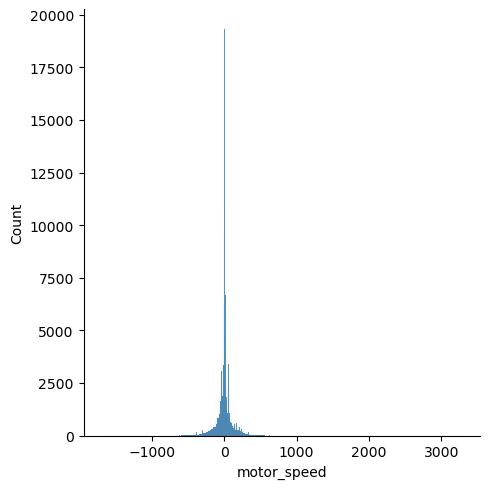

In [11]:
predict(GradientBoostingRegressor())

Model: Ridge()

Mean Squared Error: 218252.33424442614

R^2 Score: 0.9369343564037614

Mean Absolute Error: 341.81835839257263

Root Mean Squared Error: 467.17484333429826


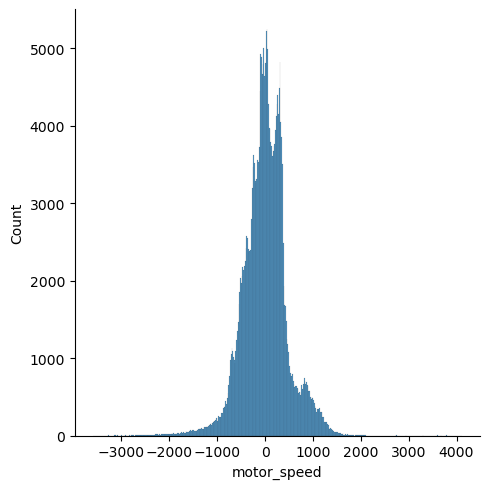

In [10]:
predict(Ridge())

Model: AdaBoostRegressor()

Mean Squared Error: 220601.08217710847

R^2 Score: 0.9362556681297838

Mean Absolute Error: 403.0888530130154

Root Mean Squared Error: 469.6818946660691


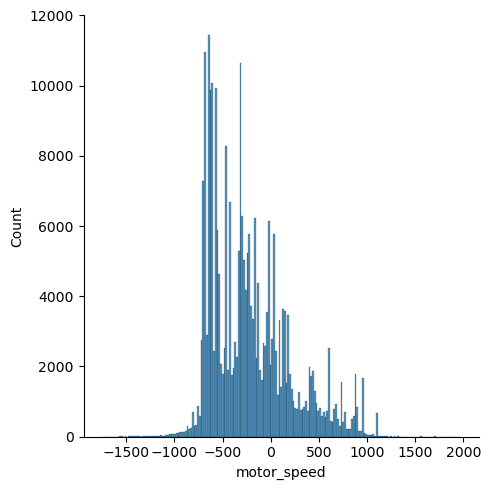

In [9]:
predict(AdaBoostRegressor())


Model: XGBRegressor(base_score=None, booster=None, callbacks=None,

             colsample_bylevel=None, colsample_bynode=None,

             colsample_bytree=None, device=None, early_stopping_rounds=None,

             enable_categorical=False, eval_metric=None, feature_types=None,

             gamma=None, grow_policy=None, importance_type=None,

             interaction_constraints=None, learning_rate=None, max_bin=None,

             max_cat_threshold=None, max_cat_to_onehot=None,

             max_delta_step=None, max_depth=None, max_leaves=None,

             min_child_weight=None, missing=nan, monotone_constraints=None,

             multi_strategy=None, n_estimators=None, n_jobs=None,

             num_parallel_tree=None, random_state=None, ...)

Mean Squared Error: 1106.8947208825793

R^2 Score: 0.9996801544954494

Mean Absolute Error: 15.579628365504563

Root Mean Squared Error: 33.27002736522138


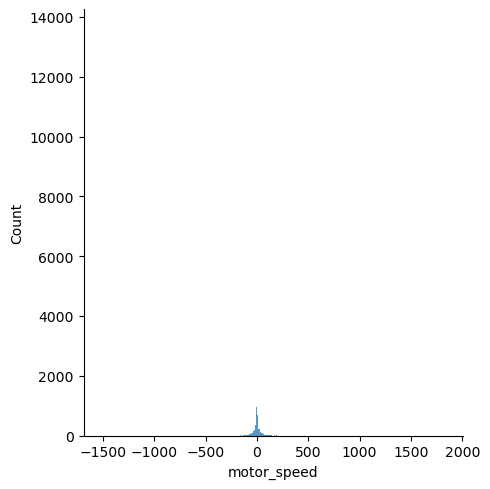

In [18]:
predict(XGBRegressor())

Model: Lasso()


C:\Users\WILLIAMS\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+10, tolerance: 3.681e+08

  model = cd_fast.enet_coordinate_descent(


Mean Squared Error: 225335.60425881372

R^2 Score: 0.9348875925798154

Mean Absolute Error: 343.74217389821473

Root Mean Squared Error: 474.6952751595635


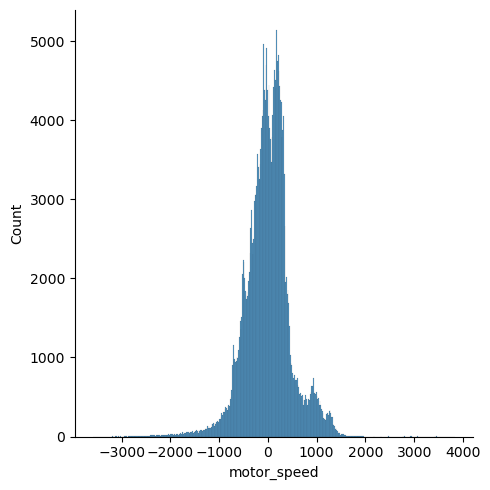

In [22]:
predict(Lasso())

In [45]:
y_test

424534       99.981087
1156633    1999.984498
797076     3548.406954
1072024    3911.873574
359348      250.003128
              ...     
895521        0.037544
1181745    1646.706742
591415      749.998962
664020     3302.817547
490248     5499.956543
Name: motor_speed, Length: 266164, dtype: float64

In [46]:
y_pred

array([584.12139268, 589.17137397, 631.70105225, ..., 582.17137754,
       620.23467935, 787.35571318])

In [47]:
X_test

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,predicted_motor_speed
424534,4.175080,18.298996,19.470448,1.480600,18.696995,-2.000426,1.096520,23.368107,18.602362,23.012505,0.432702,18,584.121393
1156633,67.859800,49.764450,91.840921,-112.387949,76.987543,-81.940312,186.695917,65.636679,65.033401,25.307312,150.000000,42,589.171374
797076,131.343989,49.258930,78.709832,1.369659,70.546131,-42.277001,-2.599181,71.587023,60.658636,25.160387,-2.983891,80,631.701052
1072024,131.524921,25.951773,63.920811,-3.017179,54.178931,-61.329965,0.374352,55.706147,42.770511,26.341890,-0.624918,65,601.096711
359348,12.060310,18.289375,19.823488,0.764874,19.210705,-2.000953,1.096710,26.102446,19.062996,23.261389,0.111280,13,583.599097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895521,1.391687,29.560364,48.713180,0.829883,44.405325,-2.000949,1.097093,46.224636,38.253773,25.626079,-0.000009,69,530.235433
1181745,46.043545,49.834344,124.312847,-111.816101,96.805784,-120.961129,239.725071,68.544816,78.571610,25.546716,197.595152,48,555.437872
591415,31.092173,18.406639,58.811481,-40.752422,44.900383,-65.979172,172.999023,44.783436,35.535587,23.953117,139.245209,16,582.171378
664020,77.574078,28.648232,64.002792,105.953221,54.530234,-106.366833,-103.099632,68.083803,43.460085,25.392192,-89.960276,75,620.234679


In [49]:
X_train

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
1251160,124.007388,77.613088,101.029631,32.209503,88.877908,-107.900625,-21.662085,77.677751,79.978385,26.384226,-1.987349e+01,79
163456,57.527096,18.913023,100.976372,-115.861679,78.706665,-167.769104,52.260456,94.319550,52.868156,23.957901,4.907787e+01,19
1023047,65.215283,61.221979,92.212654,19.930842,82.034955,-9.062089,-39.020698,73.851321,72.045574,23.452414,-2.915178e+01,62
357003,12.086784,18.833757,19.850620,0.888710,19.781832,-1.999608,1.098275,28.566383,19.597221,23.187435,1.385711e-01,13
442062,91.658028,18.452337,31.663160,-44.314957,30.187914,-13.557089,64.153259,40.761520,26.274120,22.016336,4.657424e+01,30
...,...,...,...,...,...,...,...,...,...,...,...,...
212912,3.945009,23.066671,124.161209,-130.733185,91.852173,-221.129807,114.238640,94.238861,63.778324,23.163063,1.115063e+02,23
65615,4.685454,19.392906,131.140915,-130.854553,94.806961,-230.813248,155.749313,83.380829,64.424896,23.204872,1.517621e+02,32
864087,119.097423,65.635575,101.045617,41.064676,89.085928,-96.975594,-27.797330,81.895060,78.677585,26.389876,-2.549907e+01,51
210755,2.619557,21.950739,124.393318,-130.969345,90.910141,-225.475784,115.610596,84.891563,62.610722,22.110428,1.130987e+02,23


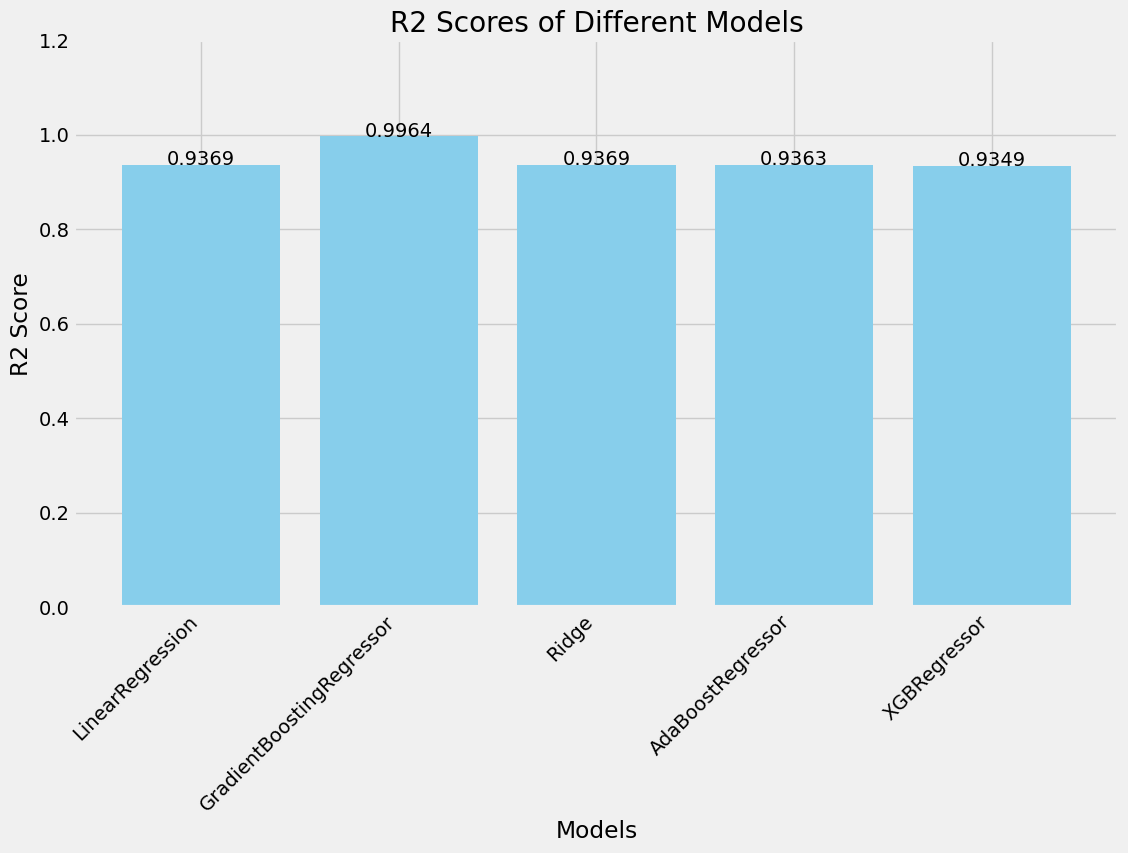

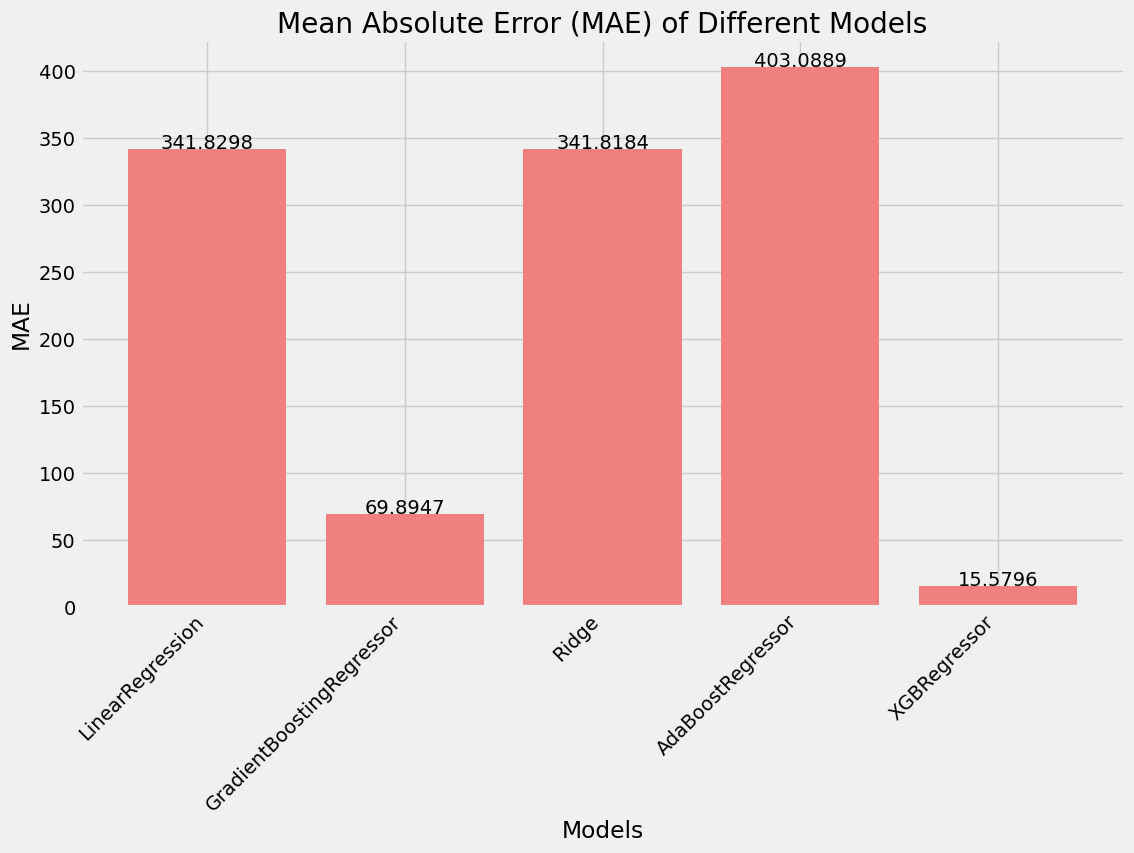

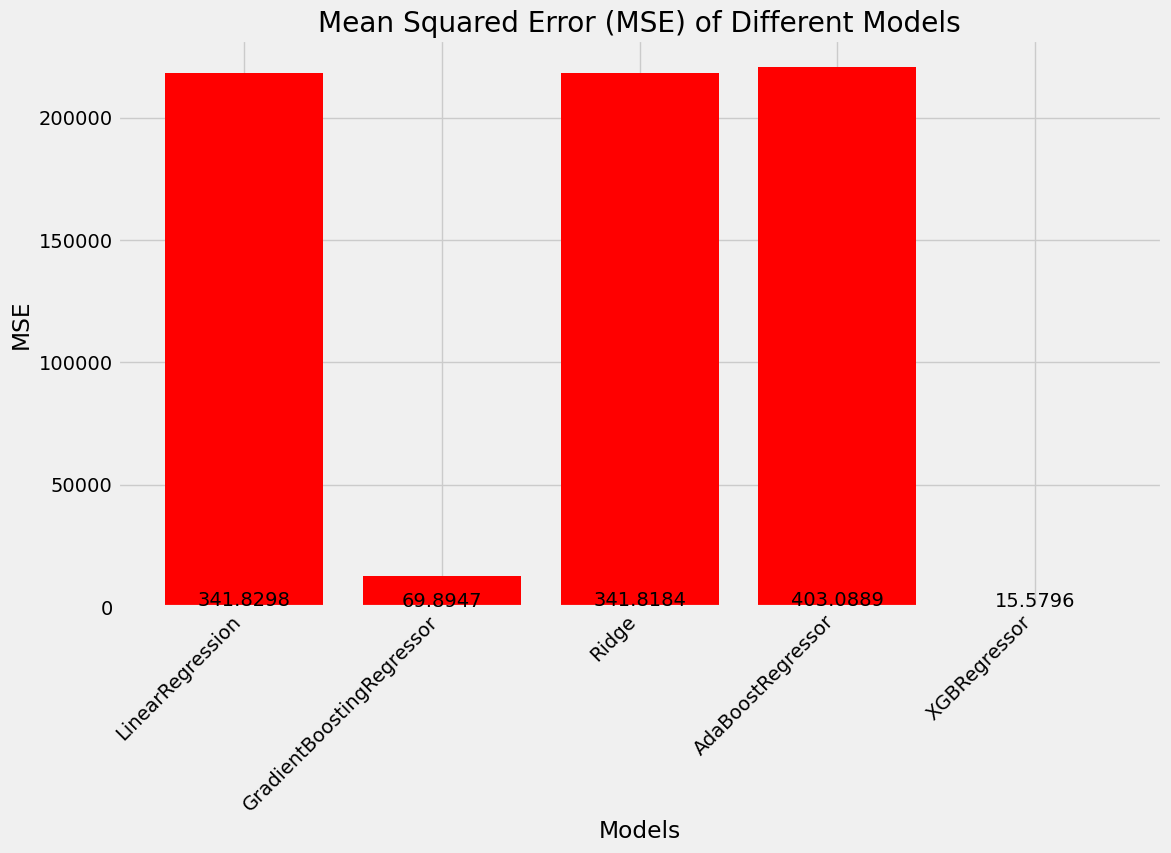

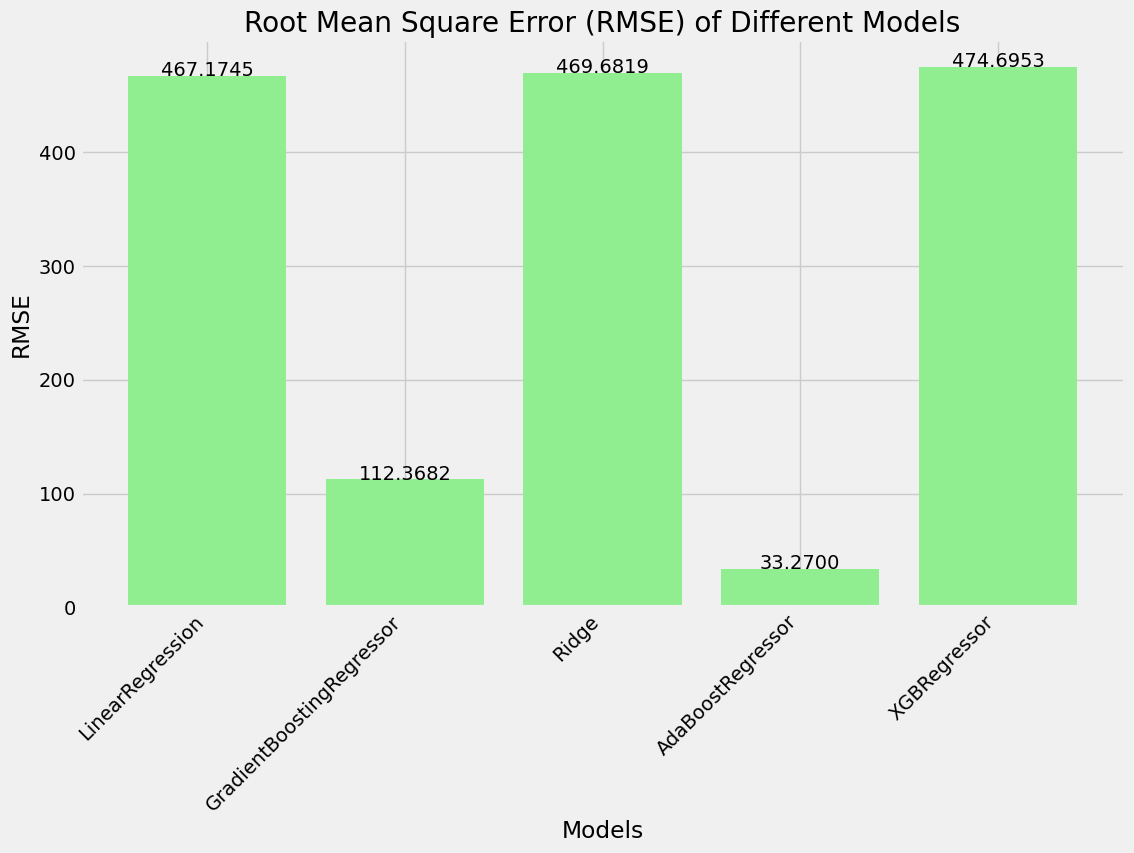

In [10]:
# Model names
models = ['LinearRegression', 'GradientBoostingRegressor', 'Ridge', 'AdaBoostRegressor','XGBRegressor']


# R2 scores
r2_scores = [0.9369344615141609, 0.9963514446970928, 0.9369343564037614, 0.9362556681297838, 0.9348875925798154]

# MAE values
mae_values = [341.8298401428008, 69.89474161235336, 341.81835839257263, 403.0888530130154, 15.579628365504563 ]

#MSE Values
mse_values = [218251.97048709771, 12626.61674520482, 218252.33424442614, 220601.08217710847, 1106.8947208825793]

# RMSE values
rmse_values = [467.17445401808703, 112.36821946264352, 469.6818946660691, 33.27002736522138, 474.6952751595635]

# Plotting R2 scores
plt.figure(figsize=(12, 7))
plt.bar(models, r2_scores, color='skyblue')
plt.title('R2 Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim([0, 1.2])  # Set the y-axis limit to better visualize differences
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center')

plt.show()

# Plotting MAE values
plt.figure(figsize=(12, 7))
plt.bar(models, mae_values, color='lightcoral')
plt.title('Mean Absolute Error (MAE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(mae_values):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center')

plt.show()

# Plotting MSE values
plt.figure(figsize=(12, 7))
plt.bar(models, mse_values, color='red')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(mae_values):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center')

plt.show()

# Plotting RMSE values
plt.figure(figsize=(12, 7))
plt.bar(models, rmse_values, color='lightgreen')
plt.title('Root Mean Square Error (RMSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(rmse_values):
    plt.text(i, score + 0.0001, f'{score:.4f}', ha='center')
    
plt.show()


C:\Users\WILLIAMS\AppData\Local\Temp\ipykernel_4792\2031235748.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(models, rotation=45, ha='right')


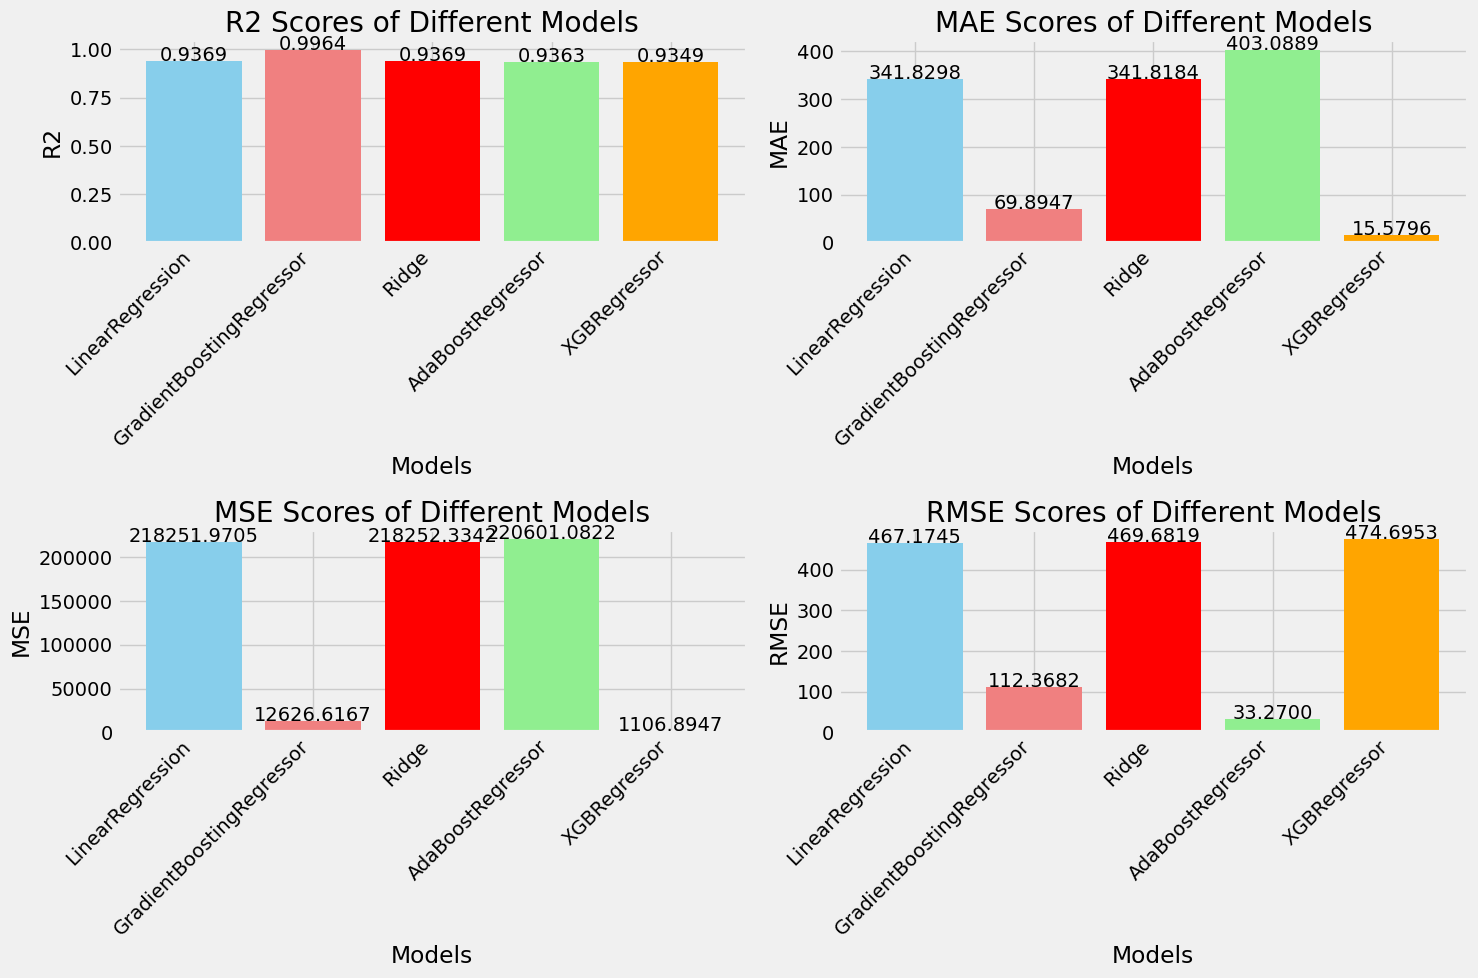

In [11]:
# Model names
models = ['LinearRegression', 'GradientBoostingRegressor', 'Ridge', 'AdaBoostRegressor', 'XGBRegressor']

# Scores
scores = {
    'R2': [0.9369344615141609, 0.9963514446970928, 0.9369343564037614, 0.9362556681297838, 0.9348875925798154],
    'MAE': [341.8298401428008, 69.89474161235336, 341.81835839257263, 403.0888530130154, 15.579628365504563],
    'MSE': [218251.97048709771, 12626.61674520482, 218252.33424442614, 220601.08217710847, 1106.8947208825793],
    'RMSE': [467.17445401808703, 112.36821946264352, 469.6818946660691, 33.27002736522138, 474.6952751595635]
}

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, metric in enumerate(scores.keys()):
    ax = axes[i // 2, i % 2]
    ax.bar(models, scores[metric], color=['skyblue', 'lightcoral', 'red', 'lightgreen', 'orange'])
    ax.set_title(f'{metric} Scores of Different Models')
    ax.set_xlabel('Models')
    ax.set_ylabel(metric)
    ax.set_xticklabels(models, rotation=45, ha='right')
    
    # Display the scores on top of the bars
    for j, score in enumerate(scores[metric]):
        ax.text(j, score + 0.0001, f'{score:.4f}', ha='center')

plt.tight_layout()
plt.show()


## Model explanation

From the above model prediction we can see that:
    
>1) Linear and Ridge gives r2 score 0.936, but after displaying the distribution plot we can see that there is no
   chance of overfitting due to the even distribution and the bell curved shape in the plot
    
>2) Lasso gives r2 score 0.934, but after displaying the distribution plot we can see that there is also no
   chance of overfitting

>3) XgbRegressor  gives the r2 score of 0.999 with a clear chace of overfitting

>4) AdaBoost gives r2 score 0.936, but after displaying the distribution plot we can see that there is also no
   chance of overfitting

>5) Lastly, GradientBoostRegressor gives r2 score 0.993, but after displaying the distribution plot we can see that there is
   chance of overfitting
    
From the observation we can conclude that the Linear and Ridge are our final model because they have a good R2 score 
and low MAE, RMSE compared to AdaBoost and The Lasso.

### Comments
> Excellent explanation. Also include what exactly in the plot did you see that made you come to the decision that some models did not overfit while some did, for example is it the shape of the distribution? or the spread of the datapoints? or the height? etc.

> <b> SCORE: 9/10 </b>

# Comparative Analysis

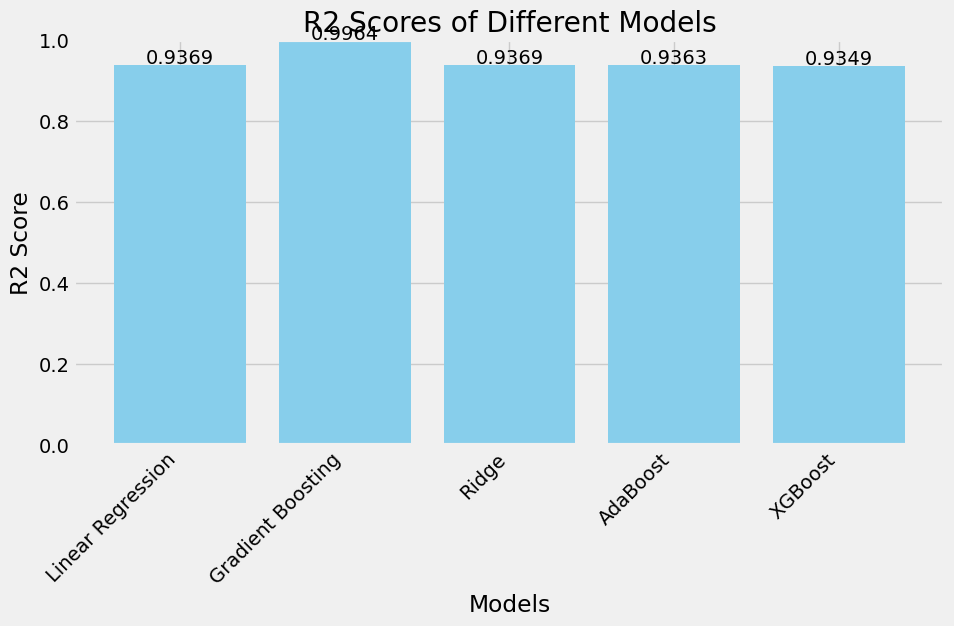

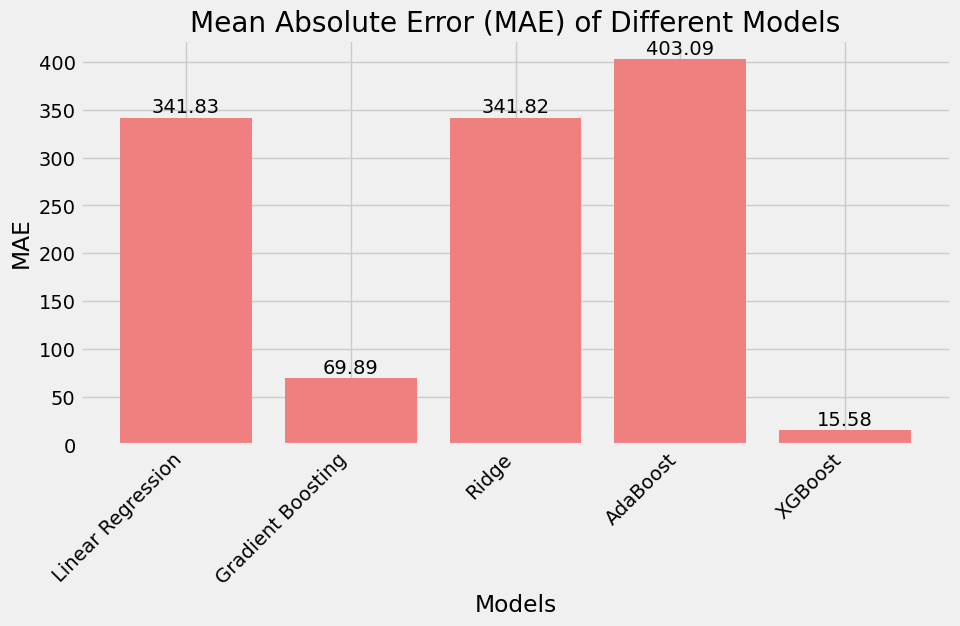

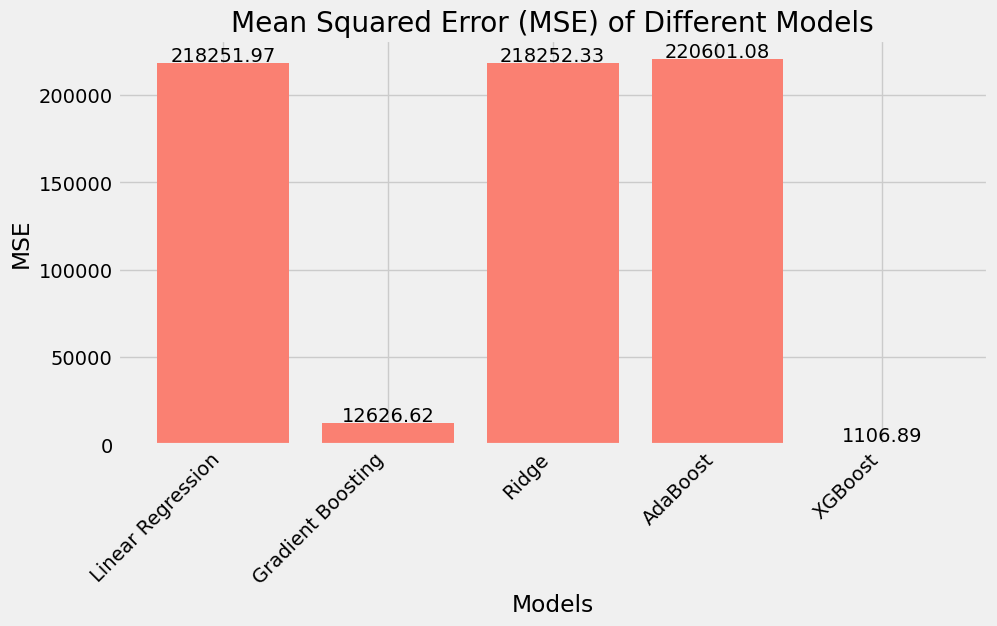

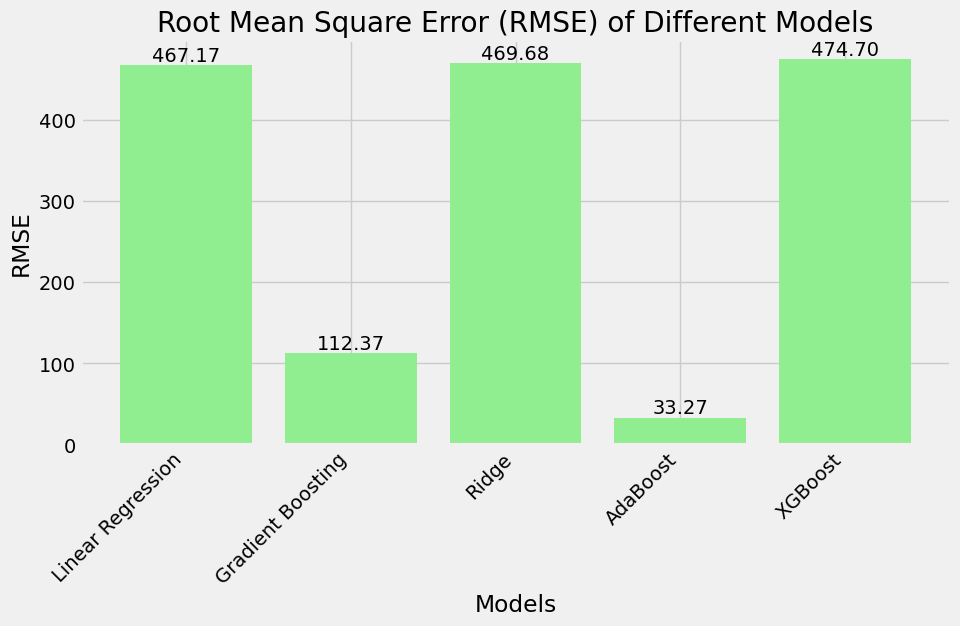

In [19]:
# Model names
models = ['Linear Regression', 'Gradient Boosting', 'Ridge', 'AdaBoost', 'XGBoost']

# R2 scores
r2_scores = [0.9369, 0.9964, 0.9369, 0.9363, 0.9349]

# MAE values
mae_values = [341.8298, 69.8947, 341.8184, 403.0889, 15.5796]

# MSE Values
mse_values = [218251.9705, 12626.6167, 218252.3342, 220601.0822, 1106.8947]

# RMSE values
rmse_values = [467.1745, 112.3682, 469.6819, 33.2700, 474.6953]

# Plotting R2 scores
plt.figure(figsize=(10, 5))
plt.bar(models, r2_scores, color='skyblue')
plt.title('R2 Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.ylim([0, 1])  
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(r2_scores):
    plt.text(i, score + 0.005, f'{score:.4f}', ha='center')

plt.show()

# Plotting MAE values
plt.figure(figsize=(10, 5))
plt.bar(models, mae_values, color='lightcoral')
plt.title('Mean Absolute Error (MAE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(mae_values):
    plt.text(i, score + 5, f'{score:.2f}', ha='center')

plt.show()

# Plotting MSE values
plt.figure(figsize=(10, 5))
plt.bar(models, mse_values, color='salmon')
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(mse_values):
    plt.text(i, score + 1000, f'{score:.2f}', ha='center')

plt.show()

# Plotting RMSE values
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='lightgreen')
plt.title('Root Mean Square Error (RMSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')

# Display the scores on top of the bars
for i, score in enumerate(rmse_values):
    plt.text(i, score + 5, f'{score:.2f}', ha='center')

plt.show()




1. **R2 Scores**:
   - Gradient Boosting has the highest R2 score of 0.9964, indicating the best overall performance in explaining the variance in the data.
   - Linear Regression, Ridge, AdaBoost, and XGBoost have R2 scores ranging from 0.9349 to 0.9369, suggesting similar performance levels but lower than Gradient Boosting.

2. **Mean Absolute Error (MAE)**:
   - XGBoost has the lowest MAE value of 15.58, indicating the best performance in terms of average absolute prediction error.
   - Gradient Boosting and Linear Regression also have relatively low MAE values, while Ridge and AdaBoost have higher MAE values compared to the other models.

3. **Mean Squared Error (MSE)**:
   - Gradient Boosting has the lowest MSE value of 12626.62, indicating the best performance in terms of average squared prediction error.
   - Linear Regression, Ridge, and AdaBoost have similar MSE values, while XGBoost has a slightly higher MSE value.

4. **Root Mean Squared Error (RMSE)**:
   - XGBoost has the lowest RMSE value of 33.27, indicating the best performance in terms of average squared prediction error.
   - Gradient Boosting, Linear Regression, and AdaBoost also have relatively low RMSE values, while Ridge has a higher RMSE value compared to the other models.

Therefore, Gradient Boosting and XGBoost consistently perform well across all metrics, while Linear Regression, Ridge, and AdaBoost show similar performance levels but slightly lower than Gradient Boosting and XGBoost. This analysis provides insights into the relative strengths and weaknesses of each model, helping in selecting the most suitable model for the given task.

In assessing model performance, both Gradient Boosting and XGBoost consistently demonstrate strong predictive capabilities across various metrics. However, a closer examination of their distribution plots reveals a notable characteristic: their distributions do not exhibit a bell-shaped curve and fail to intersect the zero axis. This non-ideal shape suggests a propensity towards overfitting, implying that these models may be memorizing the training data rather than generalizing effectively.

Conversely, Linear Regression and Ridge Regression models exhibit favorable characteristics in their distribution plots, showcasing bell-shaped curves with even distributions that intersect the zero axis. This indicates a more balanced and adaptive learning behavior, conducive to generalization beyond the training data. Furthermore, these models demonstrate competitive R2 scores and exhibit lower Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) values compared to their counterparts.

In light of these observations, Linear Regression and Ridge Regression emerge as the preferred models for their robust performance metrics and more favorable distribution characteristics, suggesting their suitability for addressing the underlying data patterns effectively while mitigating the risk of overfitting.

### Comments
> So what is the result of your comparative analysis? which model will you say performed best and why? What are your recommendations? and what do you think are the limitations of the models you've built?

> <b> SCORE: 4/10 </b>

### The problem we are working on involves both Supervised Learning and Regression Modeling:

1. Supervised Learning: The analysis involves evaluating the performance of different machine learning models (e.g., Linear Regression, Gradient Boosting, Ridge Regression) using labeled data. In supervised learning, the model is trained on a labeled dataset, where each data point is associated with a target variable. The goal is to learn a mapping from input features to the target variable, enabling the model to make predictions on unseen data just like we have done.

2. Regression Modeling: The performance metrics assessed in the analysis are typical of regression modeling, such as R2 score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). Regression modeling aims to predict a continuous target variable based on one or more input features. In this case, the models are evaluated based on their ability to predict numerical values.

Therefore, the project can be categorized as supervised learning with a regression task. It involves training machine learning models on labeled data to predict continuous numerical values, which aligns with the characteristics of regression modeling in supervised learning.

## Final Evaluation: 32/75

This is good for a first time project. What you need to work on are;
> 1) Your presentation skills, use <b>`plt.style.use('fivethirtyeight')`</b> at the beginning of your notebook to make your graphs look nicer

> 2) Explaining the results of your analysis clearly, always include your "why"s and your "how"s. Always include the justification for your processes

> 3) Although you explained your models, you did not interprete them (This is <b>10points</b> which you missed out on). Model Interpretation will answer the questions "How is the model making its predictions?", "What features are important for the models to make its predictions?". To learn more about this read about the <b>`feature importance`</b> attribute of some linear and tree based models and how you can implement this in python

> 4) You did not also state what kind of problem you are working on, supervised? unsupervised? classification? regression? ml? deeplearning? reinforcement learning? etc. Note that the answer to this question is not singular, your project can be supervised learning and also a classification problem and also a machine learning problem. You need to learn what these terms really mean, their differences and their similarities (i.e which is a subset of which). This omission cost you <b>5points</b>

Overall this is a wonderful first time project. Implement the corrections that I laid out in this project and submit by 15th of this month. Then we'll look at another problem. Good work so far👏🏾👏🏾


# Working on Flask

##### Pickling the model

Model: LinearRegression()
Mean Squared Error: 219171.5362776797
R^2 Score: 0.936668746104459
Mean Absolute Error: 342.6256035163847
Root Mean Squared Error: 468.15759769299876


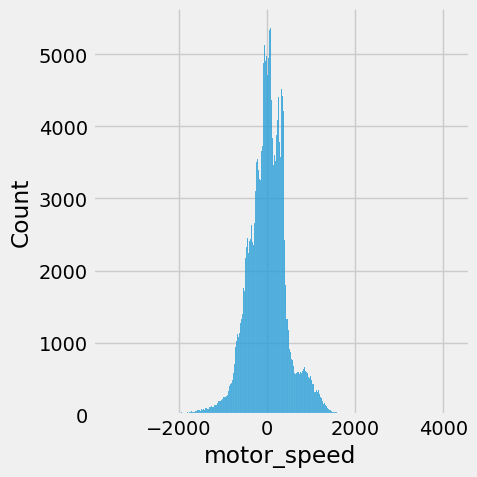

In [16]:
# Import the LinearRegression class from scikit-learn
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train, y_train)


predictions = model.predict(X_test)

predict(model)

In [17]:
import pickle


In [18]:
filename = 'model.sav'
pickle.dump(model, open(filename, "wb"))
load_model = pickle.load(open(filename, "rb"))
r = load_model.score(X_test_scaled, y_test)
r

0.936668746104459

In [19]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_test_scaled_df.head())

        u_q   coolant  stator_winding       u_d  stator_tooth       i_d  \
0 -1.134610 -0.823162       -1.635300  0.422012     -1.663889  1.027815   
1  0.307401  0.621040        0.889371 -1.382475      0.876138 -0.203233   
2  1.744870  0.597837        0.431288  0.420254      0.595452  0.407569   
3  1.748967 -0.471915       -0.084632  0.350735     -0.117754  0.114160   
4 -0.956065 -0.823603       -1.622984  0.410670     -1.641504  1.027807   

        i_q        pm  stator_yoke   ambient    torque  
0 -0.394145 -1.850233    -1.480071 -0.804601 -0.397851  
1  1.619112  0.375505     0.842586  0.385006  1.540947  
2 -0.434233  0.688833     0.623744  0.308841 -0.442139  
3 -0.401979 -0.147407    -0.271088  0.921321 -0.411560  
4 -0.394143 -1.706251    -1.457028 -0.675582 -0.402017  
